# Data Analysis Project: Bike Sharing Dataset
- **Nama:** Mohammad Faikar Natsir
- **Email:** misteralfikri@gmail.com
- **ID Dicoding:** mofasir

## 1.&nbsp;Data Description

Proses penyewaan Bike-sharing sangat berkorelasi dengan lingkungan dan kondisi musiman. Misalnya, kondisi cuaca, curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat memengaruhi perilaku penyewaan. Kumpulan data inti terkait dengan catatan historis dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., AS yang tersedia untuk umum di http://capitalbikeshare.com/system-data. Data digabungkan berdasarkan dua jenis, yaitu jam dan harian, lalu mengekstrak dan menambahkan informasi cuaca dan musiman yang sesuai. Informasi cuaca diekstrak dari http://www.freemeteo.com.
Baik hour.csv dan day.csv memiliki fitur/variabel berikut, kecuali hr yang tidak tersedia di day.csv :
- instant : indeks rekaman
- dteday : tanggal
- season : musim (1:springer, 2:summer, 3:fall, 4:winter)
- yr : tahun (0: 2011, 1:2012)
- mnth : bulan ( 1 to 12)
- hr : jam (0 to 23)
- holiday : hari cuaca libur atau tidak (diekstrak dari http://dchr.dc.gov/page/holiday-schedule)
- weekday : hari dalam seminggu
- workingday : jika hari tersebut bukan weekend atau libur adalah 1, jika tidak 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy (Cerah, Sedikit berawan, Berawan sebagian, Berawan sebagian)
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut)
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (Salju ringan, Hujan ringan + Badai petir + Awan tersebar, Hujan ringan + Awan tersebar)
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Hujan lebat + Es palet + Badai petir + Kabut, Salju + Kabut)
- temp : Suhu (normalisasi) dalam Celsius. Nilai dibagi menjadi 41 (maks)
- atemp : Suhu perasaan (normalisasi) dalam Celsius. Nilai dibagi menjadi 50 (maks)
- hum : Kelembapan (normalisasi). Nilai dibagi menjadi 100 (maks)
- windspeed : Kecepatan angin (normalisasi). Nilai dibagi menjadi 67 (maks)
- casual : jumlah pengguna kasual
- registered : jumlah pengguna terdaftar
- cnt : jumlah total sepeda sewaan termasuk kasual dan terdaftar

## 2.&nbsp;Defining Business Questions

- Bagaimana tren jumlah penyewaan sepeda bulanan untuk tahun 2011 dan 2012?
- Bagaimana distribusi jumlah penyewaan berdasarkan musim dan kondisi cuaca?
- Bagaimana pola penyewaan sepeda berdasarkan jenis pengguna selama hari kerja dibandingkan akhir pekan/libur?
- Pada jam berapa penyewaan sepeda mencapai puncaknya, dan apakah pola ini berbeda antara hari kerja dan akhir pekan?
- Bagaimana rasio penyewaan oleh pengguna kasual dibandingkan pengguna terdaftar pada berbagai kondisi cuaca?
- Bagaimana kondisi faktor lingkungan seperti suhu, kelembapan, dan kecepatan angin memengaruhi jumlah penyewaan sepeda?

## 3.&nbsp;Import The Packages/Libraries

Import library yang dibutuhkan untuk seluruh proses analisis data, di antaranya :
- `pandas` : manipulasi dan analisis data (struktur tabel, seperti DataFrame)
- `numpy` : operasi matematika dan array multidimensi
- `matplotlib` : membuat visualisasi data (grafik)
- `seaborn` : visualisasi data berbasis Matplotlib, dengan gaya yang lebih menarik

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4.&nbsp;Data Wrangling

### 4.1.&nbsp;Gathering Data

- Memuat dataset yang akan digunakan. Disini saya menggunakan kedua dataset, yaitu "hour.csv" dan "day.csv".
- Untuk mempermudah penggunaan dan akses dataset, saya menyimpan dataset tersebut di Github sehingga dapat diakses dan digunakan dalam proyek melalui URL langsung.

#### Load Data **Daily Dataset**

In [2]:
# Memuat file "day.csv" dan menampilkan 5 baris data teratas (head)
day_df = pd.read_csv("https://raw.githubusercontent.com/Mofasir/bike-sharing-analysis/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Data **Hourly Dataset**

In [3]:
# Memuat file "hour.csv" dan menampilkan 5 baris data teratas (head)
hour_df = pd.read_csv("https://raw.githubusercontent.com/Mofasir/bike-sharing-analysis/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 4.2.&nbsp;Assessing Data

Memeriksa karakteristik keseluruhan data seperti memeriksa tipe data, memeriksa nilai hilang (missing values), memeriksa nilai duplikat, dan lain-lain

#### Assessing **Daily Dataset**

**Check for Dataset Structure, Data Types, and Missing Values**

In [4]:
# Melihat rangkuman informasi "day_df"
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset `day_df` terdiri dari 731 baris (entries) dan 16 kolom (features)
- Beberapa kolom memiliki nama yang agak sulit dimengerti, kita akan menggantinya dengan nama yang mudah dipahami
- Jumlah Nilai Non-Null pada setiap kolom sama dengan jumlah baris dataset, sehingga bisa dipastikan tidak terdapat nilai hilang/missing values pada dataset
- Kolom `dteday` bertipe data `object`, kita akan mengonversinya ke dalam tipe data yang sebenarnya yaitu **datetime**
- Kolom `season`, `mnth`, `weekday`, dan `weathersit` bertipe data `int64`, kita akan mengubah nilainya ke dalam bentuk yang lebih mudah dimengerti yaitu dalam bentuk string atau **category**

In [5]:
# Cek missing values untuk memperkuat insight sebelumnya
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:** Tidak terdapat missing values dalam dataset

**Check for Duplicate Values**

In [6]:
# Cek duplikasi data
print("Number of Duplicates: ", day_df.duplicated().sum())

Number of Duplicates:  0


**Insight:** Tidak terdapat nilai duplikat dalam dataset

**Check Descriptive Statistics**

In [7]:
# Melihat statistik deskriptif "day_df"
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Kolom `yr` direpresentasikan sebagai 0 dan 1, 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya menjadi bilangan tahun yang sebenarnya.
- Pada deskripsi dataset dijelaskan bahwa kolom `temp`, `atemp`, `hum`, dan `windspeed` dinormalisasi menjadi skala 0 sampai 1. Kita akan mengubah nilainya menjadi nilai yang sebenarnya sebelum dinormalisasi, tujuannya agar lebih mudah dipahami dalam konteks kehidupan nyata.

#### Assessing **Hourly Dataset**

**Check for Dataset Structure, Data Types, and Missing Values**

In [8]:
# Melihat rangkuman informasi "day_df"
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset `hour_df` terdiri dari 17379 baris (entries) dan 17 kolom (features)
- Beberapa kolom memiliki nama yang agak sulit dimengerti, kita akan menggantinya dengan nama yang mudah dipahami
- Jumlah Nilai Non-Null pada setiap kolom sama dengan jumlah baris dataset, sehingga bisa dipastikan tidak terdapat nilai hilang/missing values pada dataset
- Kolom `dteday` bertipe data `object`, kita akan mengonversinya ke dalam tipe data yang sebenarnya yaitu **datetime**
- Kolom `season`, `mnth`, `weekday`, dan `weathersit` bertipe data `int64`, kita akan mengubah nilainya ke dalam bentuk yang lebih mudah dimengerti yaitu dalam bentuk string atau **category**

In [9]:
# Cek missing values untuk memperkuat insight sebelumnya
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:** Tidak terdapat missing values dalam dataset

**Check for Duplicate Values**

In [10]:
# Cek duplikasi data
print("Number of Duplicates: ", hour_df.duplicated().sum())

Number of Duplicates:  0


**Insight:** Tidak terdapat nilai duplikat dalam dataset

**Check Descriptive Statistics**

In [11]:
# Melihat statistik deskriptif "hour_df"
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Kolom `yr` direpresentasikan sebagai 0 dan 1, 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya menjadi bilangan tahun yang sebenarnya.
- Pada deskripsi dataset dijelaskan bahwa kolom `temp`, `atemp`, `hum`, dan `windspeed` dinormalisasi menjadi skala 0 sampai 1. Kita akan mengubah nilainya menjadi nilai yang sebenarnya sebelum dinormalisasi, tujuannya agar lebih mudah dipahami dalam konteks kehidupan nyata.

### 4.3.&nbsp;Cleaning Data

Melakukan pembersihan data berdasarkan kebutuhan analisis dan temuan dalam Assessing Data
- Menghapus kolom `instant`
- Mengganti nama kolom `dteday`, `yr`, `mnth`, `hr`, `hum`, dan `cnt`
- Mengonversi tipe data kolom `dteday` menjadi `datetime`
- Mengubah nilai pada kolom `season`, `mnth`, `weekday`, dan `weathersit` menjadi nilai kategori berdasarkan penjelasan Data Description
- Mengubah nilai pada kolom `yr` menjadi nilai tahun yang sebenarnya
- Mengubah nilai yang dinormalisasi pada kolom `temp`, `atemp`, `hum`, dan `windspeed` kembali ke skala aslinya

In [12]:
# Membuat salinan DataFrame
clean_day_df = day_df.copy()
clean_hour_df = hour_df.copy()

#### Drop `instant` column

In [13]:
# Menghapus kolom "instant" pada kedua dataset
clean_day_df.drop("instant", axis=1, inplace=True)
clean_hour_df.drop("instant", axis=1, inplace=True)

In [14]:
clean_day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
clean_hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Kolom `instant` telah dihapus dari dataframe

#### Rename `dteday`, `yr`, `mnth`, `hr`, `hum`, and `cnt` columns

In [16]:
# Mengganti nama kolom agar lebih mudah dibaca dan dipahami
def rename_columns(df):
  df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "hum": "humidity",
    "cnt": "count"
  }, inplace=True)

rename_columns(clean_day_df)
rename_columns(clean_hour_df)

In [17]:
# Cek nama kolom pada day_df
clean_day_df.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [18]:
# Cek nama kolom pada hour_df
clean_hour_df.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

**Insight:** Kolom `dteday`, `yr`, `mnth`, `hr`, `hum`, dan `cnt` telah berganti namanya, sehingga mudah dibaca dan dimengerti

#### Convert `dteday`/`date` to `datetime` data type

In [19]:
# Mengonversi kolom "date" dari tipe data "object" menjadi "datetime"
clean_day_df["date"] = pd.to_datetime(clean_day_df["date"])
clean_hour_df["date"] = pd.to_datetime(clean_hour_df["date"])

In [20]:
clean_day_df.dtypes

,0
date,datetime64[ns]
season,int64
year,int64
month,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64
atemp,float64


In [21]:
clean_hour_df.dtypes

,0
date,datetime64[ns]
season,int64
year,int64
month,int64
hour,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


**Insight:** Kolom `date` telah dikonversi tipe datanya menjadi `datetime64[ns]`

#### Correct the values of `year`, `season`, `month`, `weekday`, and `weathersit` columns

In [22]:
# Mengganti nilai kolom "year" dengan bilangan tahun
clean_day_df["year"] = clean_day_df["date"].dt.strftime("%Y")
clean_hour_df["year"] = clean_hour_df["date"].dt.strftime("%Y")

In [23]:
# Mengganti nilai kolom "season" dengan nama musim
season_map = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

clean_day_df["season"] = clean_day_df["season"].map(season_map)
clean_hour_df["season"] = clean_hour_df["season"].map(season_map)

In [24]:
# Mengganti nilai kolom "month" dengan nama bulan
clean_day_df["month"] = clean_day_df["date"].dt.strftime("%B")
clean_hour_df["month"] = clean_hour_df["date"].dt.strftime("%B")

In [25]:
# Mengganti nilai kolom "weekday" dengan nama hari
clean_day_df["weekday"] = clean_day_df["date"].dt.strftime("%A")
clean_hour_df["weekday"] = clean_hour_df["date"].dt.strftime("%A")

In [26]:
# Mengganti nilai kolom "weathersit" menjadi deskripsi yang lebih mudah dibaca
weather_map = {
    1: "Clear",
    2: "Mist",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
}

clean_day_df["weathersit"] = clean_day_df["weathersit"].map(weather_map)
clean_hour_df["weathersit"] = clean_hour_df["weathersit"].map(weather_map)

In [27]:
clean_day_df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
clean_hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
# Mengubah tipe data ke categorical
categorical_columns = [
    "year",
    "season",
    "month",
    "weekday",
    "weathersit"
]
clean_day_df[categorical_columns] = clean_day_df[categorical_columns].astype("category")
clean_hour_df[categorical_columns] = clean_hour_df[categorical_columns].astype("category")

In [30]:
clean_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

In [31]:
clean_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  category      
 3   month       17379 non-null  category      
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: category(5), dateti

**Insight:** Kolom `year`, `season`, `month`, `weekday`, dan `weathersit` telah disesuaikan nilainya dan dikonversi tipe datanya menjadi `category`

#### Convert normalized values (`temp`, `atemp`, `humidity`, `windspeed`) back to original scale

In [32]:
# Mengubah nilai yang dinormalisasi kembali ke skala aslinya
def denormalize_column(df):
  df["temp"] = df["temp"] * 41
  df["atemp"] = df["atemp"] * 50
  df["humidity"] = df["humidity"] * 100
  df["windspeed"] = df["windspeed"] * 67

denormalize_column(clean_day_df)
denormalize_column(clean_hour_df)

In [33]:
clean_day_df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [34]:
clean_hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:** Kolom `temp`, `atemp`, `humidity`, dan `windspeed` telah dikembalikan nilainya ke skala aslinya

## 5.&nbsp;Exploratory Data Analysis (EDA)

### 5.1.&nbsp;Statistical Summary

In [35]:
# Menganalisis rangkuman statistik dari "Daily Dataset"
clean_day_df.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,August,NaN,Monday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [36]:
# Menganalisis rangkuman statistik dari "Hourly Dataset"
clean_hour_df.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,July,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**Insight:**
- Periode data dari 1 Januari 2011 hingga 31 Desember 2012, mencakup data per hari dan per jam selama 2 tahun
- Penggunaan Sepeda:
 - Rata-rata rental harian adalah **4504 sepeda**, dengan maksimum **8714** dan minimum **22**.
 - Pada tingkat jam, rata-rata rental adalah **189 sepeda**, dengan maksimum **977**.
- Pengguna/Penyewa:
 - Pengguna **registered** mendominasi baik secara harian (3656/hari) maupun per jam (153/jam), dibandingkan pengguna **casual** (848/hari dan 35/jam).
- Musim dan Cuaca:
 - Musim Gugur/**Fall** paling sering tercatat (188 hari dan 4496 jam), dengan kondisi cuaca dominan adalah **Clear**.
- Faktor Lingkungan:
 - Suhu rata-rata adalah **20°C**, kelembapan **63%**, dan kecepatan angin **13 km/h**. Kondisi ekstrem pada variabel ini cenderung memengaruhi jumlah rental.

### 5.2.&nbsp;Analyze Daily Patterns

**Calculate daily metrics**

In [37]:
# Menghitung rata-rata penyewaan weekday & weekend
avg_weekday_rentals = clean_day_df[clean_day_df["workingday"] == 1]["count"].mean()
avg_weekend_rentals = clean_day_df[clean_day_df["workingday"] == 0]["count"].mean()

# Menemukan indeks untuk jumlah rental tertinggi dan terendah
highest_rental_idx = clean_day_df["count"].idxmax()
lowest_rental_idx = clean_day_df["count"].idxmin()

# Informasi rental tertinggi
highest_rental = {
    "date": clean_day_df.loc[highest_rental_idx, "date"],
    "weekday": clean_day_df.loc[highest_rental_idx, "weekday"],
    "count": clean_day_df.loc[highest_rental_idx, "count"]
}

# Informasi rental terendah
lowest_rental = {
    "date": clean_day_df.loc[lowest_rental_idx, "date"],
    "weekday": clean_day_df.loc[lowest_rental_idx, "weekday"],
    "count": clean_day_df.loc[lowest_rental_idx, "count"]
}

print("Average Rentals on Weekdays:", avg_weekday_rentals)
print("Average Rentals on Weekends:", avg_weekend_rentals)

print("\nHighest Rental:")
print(f"Date: {highest_rental['date']}, Day: {highest_rental['weekday']}, Count: {highest_rental['count']}")

print("\nLowest Rental:")
print(f"Date: {lowest_rental['date']}, Day: {lowest_rental['weekday']}, Count: {lowest_rental['count']}")

Average Rentals on Weekdays: 4584.82
Average Rentals on Weekends: 4330.168831168831

Highest Rental:
Date: 2012-09-15 00:00:00, Day: Saturday, Count: 8714

Lowest Rental:
Date: 2012-10-29 00:00:00, Day: Monday, Count: 22


**Insight:**
- Rata-rata penyewaan pada hari kerja sedikit lebih tinggi dibandingkan akhir pekan.
- Puncak penyewaan terjadi pada hari **Sabtu, 15 September 2012**, yang bisa menunjukkan adanya aktivitas/acara khusus pada akhir pekan tersebut.
- Penyewaan terendah jatuh pada hari **Senin, 29 Oktober 2012**.


**Calculate the average daily rental**

In [38]:
# Mengatur "weekday" sebagai kategori dengan urutan yang benar
clean_day_df["weekday"] = pd.Categorical(
    clean_day_df["weekday"],
    categories=["Monday", "Tuesday", "Wednesday", "Thursday",
                "Friday", "Saturday", "Sunday"
    ],
    ordered=True
)

# Menghitung rata-rata jumlah sewa berdasarkan "weekday"
avg_rentals_by_weekday = clean_day_df.groupby("weekday", observed=False)["count"].mean()
avg_rentals_by_weekday.rename("count(avg)", inplace=True)
avg_rentals_by_weekday

,count(avg)
weekday,
Monday,4338.123810
Tuesday,4510.663462
Wednesday,4548.538462
Thursday,4667.259615
Friday,4690.288462
Saturday,4550.542857
Sunday,4228.828571


**Insight:**
- Hari **Jumat** merupakan hari dengan rata-rata penyewaan tertinggi.
- Hari dengan penyewaan terendah yaitu hari **Minggu**.
- Rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan penggunaan yang lebih tinggi untuk keperluan sehari-hari atau perjalanan kerja.
- Ada peningkatan bertahap dalam jumlah penyewaan dari **Senin** hingga **Jumat**.

**Calculate holiday vs non-holiday impact**

In [39]:
# Menghitung dampak hari libur vs non-hari libur
holiday_impact = clean_day_df.groupby("holiday")["count"].mean()
holiday_impact.rename("count(avg)", inplace=True)
holiday_impact

,count(avg)
holiday,
0,4527.104225
1,3735.000000


**Insight:**
- Penyewaan sepeda lebih tinggi pada hari-hari biasa, mungkin karena kebutuhan transportasi rutin seperti pergi bekerja atau sekolah.
- Pada hari libur, orang mungkin memiliki kegiatan alternatif atau bepergian ke luar kota sehingga mengurangi kebutuhan akan penyewaan sepeda.

### 5.3.&nbsp;Analyze Monthly & Seasonal Patterns

**Calculate monthly growth rates**

In [40]:
# Mengatur "month" sebagai kategori dengan urutan yang benar
clean_day_df["month"] = pd.Categorical(
    clean_day_df["month"],
    categories=[
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ],
    ordered=True
)

# Group by "month" dan hitung total serta rata-rata
monthly_totals = clean_day_df.groupby("month", observed=False)["count"].sum()
monthly_averages = clean_day_df.groupby("month", observed=False)["count"].mean()

# Menghitung pertumbuhan bulanan (persentase perubahan)
monthly_growth = monthly_totals.pct_change() * 100

# Buat DataFrame gabungan
monthly_analysis = pd.DataFrame({
    "Total": monthly_totals,
    "Average": monthly_averages,
    "Growth Rate (%)": monthly_growth
})

monthly_analysis.fillna({"Growth Rate (%)": 0}, inplace=True)
monthly_analysis

,Total,Average,Growth Rate (%)
month,,,
January,134933,2176.338710,0.000000
February,151352,2655.298246,12.168261
March,228920,3692.258065,51.250066
April,269094,4484.900000,17.549362
May,331686,5349.774194,23.260273
June,346342,5772.366667,4.418637
July,344948,5563.677419,-0.402492
August,351194,5664.419355,1.810708
September,345991,5766.516667,-1.481517


**Insight:**
- Pertumbuhan tertinggi ada pada bulan **Maret** dengan peningkatan sebesar **51,25%** dan terendah ada pada bulan **November** dengan penurunan sebesar **-20,95%**.
- Bulan dengan pertumbuhan positif termasuk **Februari**, **Maret**, **April**, **Mei**, **Juni**, dan **Agustus**, menunjukkan peningkatan penggunaan sepeda dalam periode ini.
- Penurunan terjadi pada bulan **Juli**, **September**, **Oktober**, **November**, dan **Desember**, mengindikasikan faktor-faktor yang mungkin mengurangi penggunaan sepeda.

**Calculate seasonal indices**

In [41]:
# Menghitung indeks musiman
seasonal_indices = clean_day_df.groupby("season", observed=False)["count"].mean() / clean_day_df["count"].mean()
seasonal_indices.rename("count(indices)", inplace=True)
seasonal_indices

,count(indices)
season,
Fall,1.253079
Spring,0.578137
Summer,1.108336
Winter,1.049688


**Insight:**
- **Fall (Musim Gugur)** memiliki indeks tertinggi dengan nilai **1,25**.
- Sementara **Spring (Musim Semi)** memiliki indeks terendah dengan nilai **0,58**.

### 5.4.&nbsp;Analyze Hourly Patterns

**Calculate user type patterns by hour**

In [42]:
# Menghitung pola pengguna setiap jam
hourly_user_patterns = clean_hour_df.groupby("hour")[["casual", "registered", "count"]].mean()
hourly_user_patterns

,casual,registered,count
hour,,,
0,10.158402,43.739669,53.898072
1,6.504144,26.871547,33.375691
2,4.772028,18.097902,22.869930
3,2.715925,9.011478,11.727403
4,1.253945,5.098996,6.352941
5,1.411437,18.478382,19.889819
6,4.161379,71.882759,76.044138
7,11.055021,201.009629,212.064649
8,21.679505,337.331499,359.011004


**Insight:**
- **Jam 17:00** menunjukkan puncak tertinggi dengan rata-rata penyewaan sebanyak **461.45**. Ini kemungkinan besar karena jam pulang kerja.
- **Jam 4:00** memiliki penyewaan terendah dengan rata-rata **6.35**. Ini bisa disebabkan oleh waktu tidur bagi sebagian besar orang.
- Pengguna terdaftar **(registered)** memiliki jumlah penyewaan yang lebih tinggi secara konsisten sepanjang hari dibandingkan pengguna kasual **(casual)**, terutama pada jam-jam sibuk seperti **7:00** hingga **9:00** pagi dan **16:00** hingga **18:00** sore.

**Calculate weekday vs weekend hourly patterns**

In [43]:
# Menghitung pola per jam pada hari kerja vs akhir pekan
weekday_patterns = clean_hour_df[clean_hour_df["workingday"] == 1].groupby("hour")["count"].mean()
weekend_patterns = clean_hour_df[clean_hour_df["workingday"] == 0].groupby("hour")["count"].mean()

# Gabungkan menjadi satu DataFrame
hourly_patterns = pd.concat([weekday_patterns, weekend_patterns], axis=1)
hourly_patterns.columns = ["Weekday", "Weekend"]

# Reset index jika diperlukan
hourly_patterns = hourly_patterns.reset_index()
hourly_patterns

,hour,Weekday,Weekend
0,0,36.786290,90.800000
1,1,16.552632,69.508696
2,2,8.683778,53.171053
3,3,4.942553,25.775330
4,4,5.429787,8.264317
5,5,24.913131,8.689189
6,6,102.500000,18.742358
7,7,290.612903,43.406926
8,8,477.006048,105.653680
9,9,241.518145,171.623377


**Insight:**
- Pada waktu tengah malam hingga jam **3.00**, penyewaan sepeda pada akhir pekan lebih tinggi dibandingkan hari kerja.
- Penyewaan pada pagi hari **(jam 6-8)** terdapat peningkatan yang sangat signifikan pada hari kerja, terutama pada **jam 8** dengan **477.01** penyewaan dibandingkan dengan hanya **105.65** pada akhir pekan.
- Puncak tertinggi terjadi pada **jam 17** pada hari kerja dengan **525.29** penyewaan, dan **jam 13** pada akhir pekan dengan **372,73** penyewaan
- Penyewaan sepeda pada hari kerja cenderung lebih tinggi pada jam kerja **(6-9 pagi dan 16-19 sore)**.
- Pada akhir pekan, jumlah penyewaan meningkat secara signifikan mulai dari **jam 10** pagi hingga sore hari **(13-17)**.
- Kedua kategori (hari kerja dan akhir pekan) menunjukkan penurunan penyewaan yang signifikan setelah **jam 21**, dengan penyewaan menurun drastis pada **jam 4** pagi.

### 5.5.&nbsp;Analyze Weather Impact

**Calculate average rentals by weather situation**

In [44]:
# Menghitung rata-rata sewa berdasarkan situasi cuaca (day)
weather_impact_day = clean_day_df.groupby("weathersit", observed=False)["count"].agg(["mean", "std", "count"])
weather_impact_day

,mean,std,count
weathersit,,,
Clear,4876.786177,1879.483989,463
Light Rain/Snow,1803.285714,1240.284449,21
Mist,4035.862348,1809.109918,247


In [45]:
# Menghitung rata-rata sewa berdasarkan situasi cuaca (hour)
weather_impact_hour = clean_hour_df.groupby("weathersit", observed=False)["count"].agg(["mean", "std", "count"])
weather_impact_hour

,mean,std,count
weathersit,,,
Clear,204.869272,189.487773,11413
Heavy Rain/Snow,74.333333,77.925178,3
Light Rain/Snow,111.579281,133.781045,1419
Mist,175.165493,165.431589,4544


**Insight:**
- Penyewaan sepeda cenderung lebih tinggi saat cuaca cerah dan menurun saat cuaca buruk (hujan/salju).
- Kabut memiliki dampak yang lebih kecil dibandingkan hujan/salju pada jumlah penyewaan sepeda.

**Calculate correlation between weather variables and rentals**

In [46]:
# Menghitung korelasi antara variabel cuaca dan penyewaan (day)
weather_corr_day = clean_day_df[["temp", "atemp", "humidity", "windspeed", "count"]].corr()["count"]
weather_corr_day

,count
temp,0.627494
atemp,0.631066
humidity,-0.100659
windspeed,-0.234545
count,1.000000


In [47]:
# Menghitung korelasi antara variabel cuaca dan penyewaan (hour)
weather_corr_hour = clean_hour_df[["temp", "atemp", "humidity", "windspeed", "count"]].corr()["count"]
weather_corr_hour

,count
temp,0.404772
atemp,0.400929
humidity,-0.322911
windspeed,0.093234
count,1.000000


**Insight:**
- Hubungan positif yang kuat antara suhu dan jumlah penyewaan menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca hangat.
- Korelasi negatif dengan kelembapan menunjukkan bahwa kondisi yang lebih lembap dapat mengurangi minat dalam menyewa sepeda.
- Kecepatan Angin: Pengaruh kecepatan angin relatif kecil terhadap jumlah penyewaan, namun sedikit negatif pada dataset per jam.

## 6.&nbsp;Visualization & Explanatory Analysis

### Question 1: Bagaimana tren jumlah penyewaan sepeda bulanan untuk tahun 2011 dan 2012?

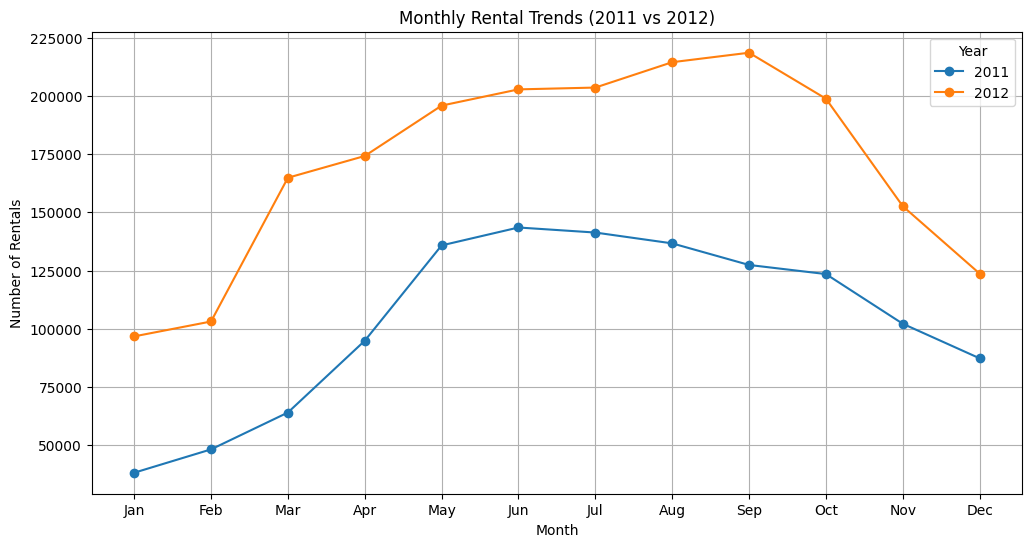

In [48]:
# Group by "year" and "month"
monthly_trends = clean_day_df.groupby([
    "year",
    "month"
], observed=False)["count"].sum().unstack(level=0)

# Plot tren bulanan
monthly_trends.plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Monthly Rental Trends (2011 vs 2012)")
plt.xlabel("Month")
plt.ylabel("Number of Rentals")
plt.xticks(range(0, 12), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.legend(title="Year")
plt.grid()
plt.show()

**Insight:**
- Jumlah penyewaan meningkat dari **Januari** hingga puncaknya di bulan **Juni dan Juli** pada tahun **2011** serta bulan **Agustus dan September** pada tahun **2012**.
- Pada tahun **2012**, jumlah penyewaan sepeda lebih tinggi secara konsisten dibandingkan tahun **2011**, dengan perbedaan signifikan pada bulan **Maret hingga November**.
- Tren menunjukkan pola musiman, di mana penyewaan menurun signifikan pada akhir tahun **(Desember)**, kemungkinan karena kondisi cuaca.

### Question 2: Bagaimana distribusi jumlah penyewaan berdasarkan musim dan kondisi cuaca?

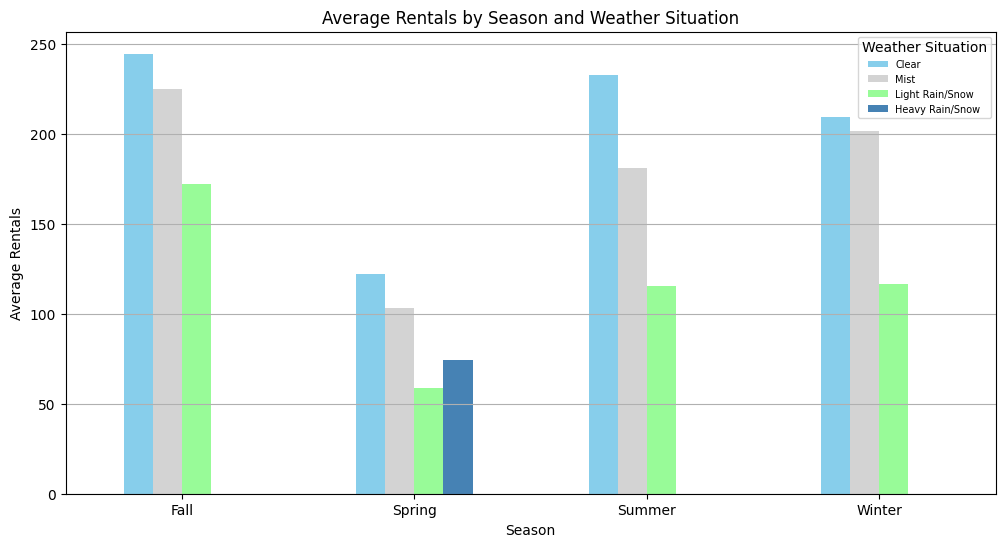

In [49]:
# Mengatur "weathersit" sebagai kategori dengan urutan yang benar
clean_hour_df["weathersit"] = pd.Categorical(
    clean_hour_df["weathersit"],
    categories=["Clear", "Mist", "Light Rain/Snow", "Heavy Rain/Snow"],
    ordered=True
)

# Group by "season" and "weathersit"
season_weather_trends = clean_hour_df.groupby([
    "season",
    "weathersit"
], observed=False)["count"].mean().unstack()

colors = ["skyblue", "lightgray", "palegreen", "steelblue"]

# Plot
season_weather_trends.plot(kind="bar", figsize=(12, 6), color=colors)
plt.title("Average Rentals by Season and Weather Situation")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.xticks(ticks=range(4), rotation=0)
plt.legend(title="Weather Situation", loc="upper right", fontsize=7)
plt.grid(axis="y")
plt.show()

**Insight:**
- Penyewaan tertinggi terjadi pada musim gugur **(Fall)** dan musim panas **(Summer)** di semua kondisi cuaca, dengan jumlah tertinggi pada cuaca cerah **(Clear)**.
- Cuaca buruk seperti hujan/salju ringan atau hujan/salju deras cenderung menurunkan jumlah penyewaan sepeda, terutama pada musim semi **(Spring)** dan musim dingin **(Winter)**.
- Penyewaan pada musim dingin tetap signifikan untuk cuaca cerah, menunjukkan bahwa pengguna masih aktif jika kondisi cuaca mendukung.

### Question 3: Bagaimana pola penyewaan sepeda berdasarkan jenis pengguna selama hari kerja dibandingkan akhir pekan/libur?

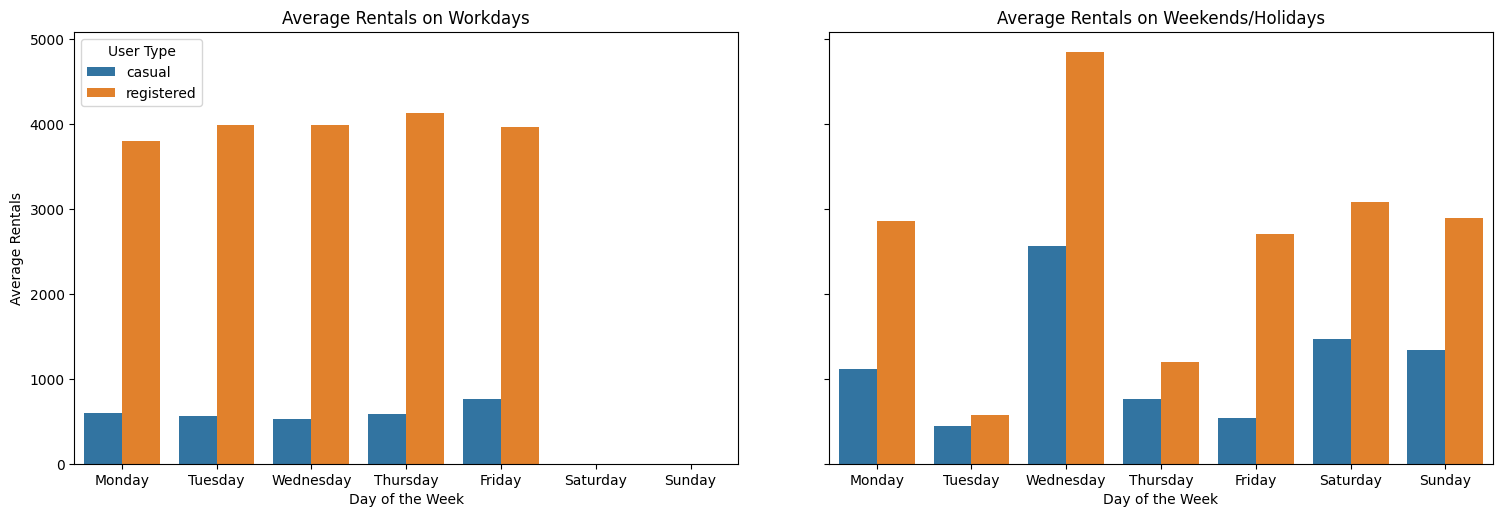

In [50]:
# Group by "weekday" and user type
user_type_patterns = clean_day_df.groupby([
    "weekday",
    "workingday"
], observed=False)[["casual", "registered"]].mean().reset_index()

# Menyiapkan ukuran plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Menyesuaikan jarak antar plot
fig.tight_layout(pad=5.0)

# Plot untuk Workdays
sns.barplot(
    data=user_type_patterns[user_type_patterns["workingday"] == 1].melt(
        id_vars=["weekday"],
        value_vars=["casual", "registered"],
        var_name="User Type",
        value_name="Average Rentals"
    ),
    x="weekday",
    y="Average Rentals",
    hue="User Type",
    ax=axes[0],
)
axes[0].set_title("Average Rentals on Workdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Rentals")

# Plot untuk Weekends
sns.barplot(
    data=user_type_patterns[user_type_patterns["workingday"] == 0].melt(
        id_vars=["weekday"],
        value_vars=["casual", "registered"],
        var_name="User Type",
        value_name="Average Rentals"
    ),
    x="weekday",
    y="Average Rentals",
    hue="User Type",
    ax=axes[1],
)
axes[1].set_title("Average Rentals on Weekends/Holidays")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("")

# Menampilkan legend hanya sekali
axes[0].legend(title="User Type", loc="upper left")
axes[1].legend_.remove()

# Menampilkan plot
plt.show()

**Insight:**
- **Pola Hari Kerja (Weekdays):**
 - Pengguna terdaftar **(registered)** konsisten mendominasi penyewaan dengan rata-rata sekitar 4000 peminjaman per hari.
 - Pola penyewaan pengguna terdaftar relatif stabil sepanjang hari kerja, dengan puncaknya pada hari **Kamis**.
 - Pengguna kasual **(casual)** menunjukkan angka yang jauh lebih rendah, dengan pola yang relatif konsisten di sepanjang hari kerja.
- **Pola Akhir Pekan/Libur (Weekends/Holidays):**
 - Terjadi pola yang sangat berbeda dibanding hari kerja, dengan puncak tertinggi terjadi pada hari **Rabu** untuk kedua tipe pengguna dan terendah pada hari **Selasa**.
 - Pengguna terdaftar tetap mendominasi, namun dengan gap yang lebih kecil terhadap pengguna kasual.
 - Pola penyewaan di akhir pekan **(Sabtu-Minggu)**  menunjukkan peningkatan signifikan pengguna kasual dibanding hari kerja, walaupun pengguna terdaftar tetap paling tinggi.
- Pola penyewaan lebih fluktuatif di hari libur/akhir pekan dibandingkan hari kerja yang cenderung stabil.


### Question 4: Pada jam berapa penyewaan sepeda mencapai puncaknya, dan apakah pola ini berbeda antara hari kerja dan akhir pekan?

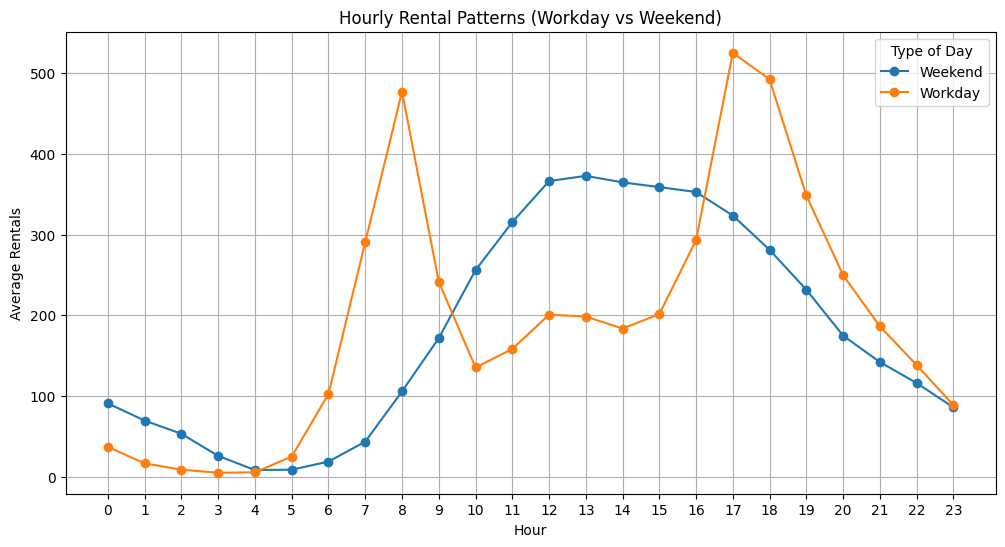

In [51]:
# Group by "hour" and "workingday"
hourly_patterns = clean_hour_df.groupby([
    "hour",
    "workingday"
], observed=False)["count"].mean().unstack()

# Plot
hourly_patterns.plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Hourly Rental Patterns (Workday vs Weekend)")
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.xticks(range(0, 24))
plt.legend(title="Type of Day", labels=["Weekend", "Workday"])
plt.grid()
plt.show()

**Insight:**
- Pada hari kerja, penyewaan sepeda mencapai puncaknya pada pukul **8 pagi** (jam sibuk pagi) dan **5 sore** (jam sibuk sore).
- Pada akhir pekan, puncaknya terjadi antara pukul **12 siang hingga 1 siang**.
- **Hari kerja:** Pola penyewaan menunjukkan aktivitas tinggi pada jam sibuk pagi dan sore, mengindikasikan penggunaan sepeda untuk keperluan komuter (perjalanan kerja).
- **Akhir pekan**: Pola penyewaan lebih stabil sepanjang hari dengan puncak di siang hari, mengindikasikan penggunaan untuk rekreasi.

### Question 5: Bagaimana rasio penyewaan oleh pengguna kasual dibandingkan pengguna terdaftar pada berbagai kondisi cuaca?

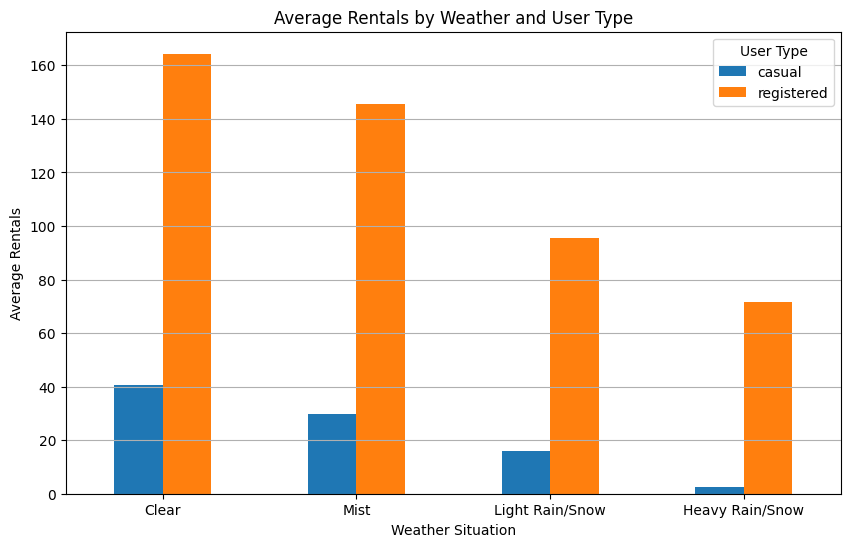

In [52]:
# Group by "weathersit" and user type
weather_user = clean_hour_df.groupby("weathersit", observed=False)[[
    "casual",
    "registered"
]].mean()

# Plot
weather_user.plot(kind="bar", figsize=(10, 6))
plt.title("Average Rentals by Weather and User Type")
plt.xlabel("Weather Situation")
plt.ylabel("Average Rentals")
plt.xticks(ticks=range(4), rotation=0)
plt.legend(title="User Type")
plt.grid(axis="y")
plt.show()

**Insight:**
- Dalam kondisi cuaca cerah **(Clear)**, penyewaan oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual, dengan rasio sekitar **4:1**.
- Dalam kondisi kabut **(Mist)**, pengguna terdaftar masih mendominasi dibandingkan pengguna kasual dengan rasio sekitar **5:1**.
- Pada **hujan/salju ringan**, pengguna terdaftar tetap lebih tinggi daripada pengguna kasual dengan rasio sekitar **5:1**.
- Pada **hujan/salju deras**, penyewaan menurun drastis untuk kedua jenis pengguna, tetapi pengguna terdaftar tetap lebih tinggi dibandingkan pengguna kasual.
- Pengguna terdaftar lebih tangguh terhadap kondisi cuaca buruk dan pengguna kasual cenderung hanya menyewa saat cuaca mendukung.

## 7.&nbsp;Analisis Lanjutan

Teknik analisis lanjutan yang digunakan adalah teknik **Binning**, yang merupakan teknik clustering sederhana tanpa penerapan machine learning. Tujuannya yaitu mengubah data numerik kontinu menjadi kategori diskrit dan menyederhanakan analisis dengan mengelompokkan rentang nilai ke dalam label yang mudah dipahami.
Implementasinya dengan menggunakan `pd.cut()` dari pandas untuk membagi data numerik ke dalam bins (kelompok). Setiap variabel lingkungan (temp, atemp, humidity, windspeed) diberi rentang nilai yang spesifik, dibagi menjadi 4 kategori.

### Question 6: Bagaimana kondisi faktor lingkungan seperti suhu, kelembapan, dan kecepatan angin memengaruhi jumlah penyewaan sepeda?

In [53]:
# Suhu (temp)
temp_bins = [0, 10, 20, 30, 40] # °C
temp_labels = ["Very Cold", "Cold", "Comfortable", "Hot"]

# Suhu yang dirasakan (atemp)
atemp_bins = [0, 10, 20, 30, 45] # °C
atemp_labels = ["Very Cold", "Cold", "Comfortable", "Hot"]

# Kelembapan (humidity)
humidity_bins = [0, 30, 60, 80, 100] # %
humidity_labels = ["Dry", "Moderate", "Humid", "Very Humid"]

# Kecepatan Angin (windspeed)
windspeed_bins = [0, 10, 20, 30, 40] # km/h
windspeed_labels = ["Calm", "Breezy", "Windy", "Very Windy"]

# Apply pd.cut
clean_day_df["temp_category"] = pd.cut(clean_day_df["temp"], bins=temp_bins, labels=temp_labels, include_lowest=True)
clean_day_df["atemp_category"] = pd.cut(clean_day_df["atemp"], bins=atemp_bins, labels=atemp_labels, include_lowest=True)
clean_day_df["humidity_category"] = pd.cut(clean_day_df["humidity"], bins=humidity_bins, labels=humidity_labels, include_lowest=True)
clean_day_df["windspeed_category"] = pd.cut(clean_day_df["windspeed"], bins=windspeed_bins, labels=windspeed_labels, include_lowest=True)

In [54]:
clean_day_df[[
    "temp",
    "temp_category",
    "atemp",
    "atemp_category",
    "humidity",
    "humidity_category",
    "windspeed",
    "windspeed_category"
]].head()

,temp,temp_category,atemp,atemp_category,humidity,humidity_category,windspeed,windspeed_category
0,14.110847,Cold,18.18125,Cold,80.5833,Very Humid,10.749882,Breezy
1,14.902598,Cold,17.68695,Cold,69.6087,Humid,16.652113,Breezy
2,8.050924,Very Cold,9.47025,Very Cold,43.7273,Moderate,16.636703,Breezy
3,8.200000,Very Cold,10.60610,Cold,59.0435,Moderate,10.739832,Breezy
4,9.305237,Very Cold,11.46350,Cold,43.6957,Moderate,12.522300,Breezy


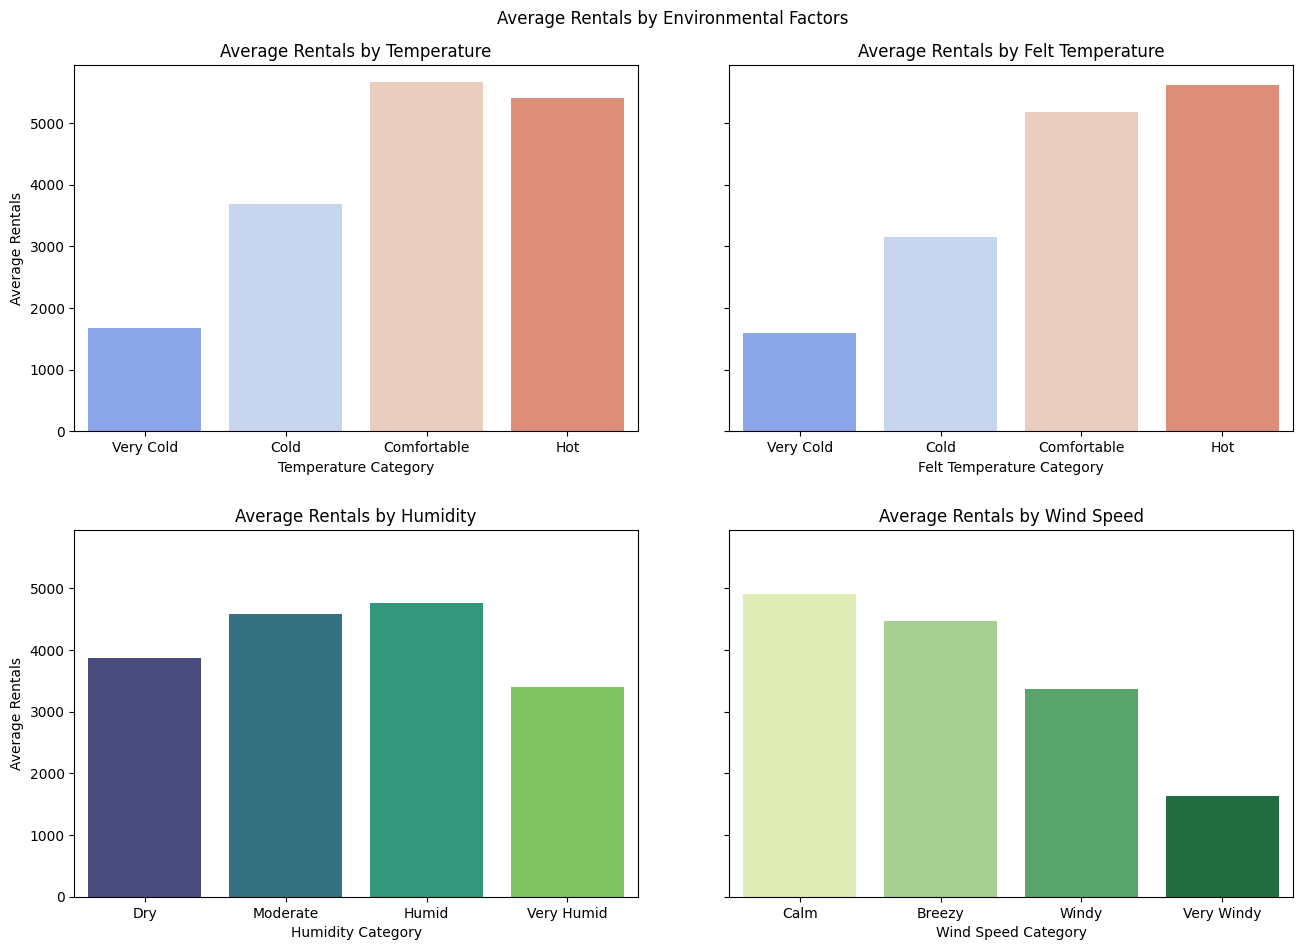

In [55]:
# Mengatur ukuran figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Menyesuaikan jarak (spacing)
fig.tight_layout(pad=5.0)

# Suhu (temp)
sns.barplot(
    data=clean_day_df,
    x="temp_category",
    y="count",
    ax=axes[0, 0],
    errorbar=None,
    palette="coolwarm",
    hue="temp_category",
    legend=False
)
axes[0, 0].set_title("Average Rentals by Temperature")
axes[0, 0].set_xlabel("Temperature Category")
axes[0, 0].set_ylabel("Average Rentals")

# Suhu yang Dirasakan (atemp)
sns.barplot(
    data=clean_day_df,
    x="atemp_category",
    y="count",
    ax=axes[0, 1],
    errorbar=None,
    palette="coolwarm",
    hue="atemp_category",
    legend=False
)
axes[0, 1].set_title("Average Rentals by Felt Temperature")
axes[0, 1].set_xlabel("Felt Temperature Category")
axes[0, 1].set_ylabel("")

# Kelembapan (humidity)
sns.barplot(
    data=clean_day_df,
    x="humidity_category",
    y="count",
    ax=axes[1, 0],
    errorbar=None,
    palette="viridis",
    hue="humidity_category",
    legend=False
)
axes[1, 0].set_title("Average Rentals by Humidity")
axes[1, 0].set_xlabel("Humidity Category")
axes[1, 0].set_ylabel("Average Rentals")

# Kecepatan Angin (windspeed)
sns.barplot(
    data=clean_day_df,
    x="windspeed_category",
    y="count",
    ax=axes[1, 1],
    errorbar=None,
    palette="YlGn",
    hue="windspeed_category",
    legend=False
)
axes[1, 1].set_title("Average Rentals by Wind Speed")
axes[1, 1].set_xlabel("Wind Speed Category")
axes[1, 1].set_ylabel("")

plt.suptitle("Average Rentals by Environmental Factors")
plt.show()

**Insight:**
- **Pengaruh Suhu (Temp & Atemp):**
 - Suhu nyaman **(Comfortable)** memiliki penyewaan tertinggi.
 - Suhu panas **(Hot)** sedikit lebih rendah, tetapi tetap signifikan.
 - Suhu sangat dingin **(Very Cold)** memiliki jumlah penyewaan terendah, menunjukkan bahwa suhu ekstrem dapat mengurangi penyewaan.
- **Pengaruh Kelembapan (Humidity):**
 - Penyewaan tertinggi terjadi pada kelembapan **sedang hingga lembap**, sementara kelembapan sangat lembap **(Very Humid)** mengurangi jumlah penyewaan.
- **Pengaruh Kecepatan Angin (Wind Speed):**
 - Penyewaan tertinggi terjadi pada saat kondisi tenang **(Calm)**, diikuti oleh berangin ringan **(Breezy)**.
 - Penyewaan menurun drastis saat kondisi sangat berangin **(Very Windy)**.
- Penyewaan meningkat pada suhu nyaman, kelembapan moderat, dan angin tenang, mengindikasikan bahwa kondisi lingkungan yang mendukung menjadi faktor penting.

## 8.&nbsp;Conclusion

- **Tren Penyewaan Bulanan:**
 - Penyewaan sepeda menunjukkan pola musiman yang jelas, dengan puncaknya di musim panas dan penurunan signifikan di musim dingin.
 - Tahun 2012 memiliki jumlah penyewaan yang lebih tinggi dibandingkan tahun 2011, kemungkinan karena meningkatnya popularitas layanan.
- **Pengaruh Musim dan Cuaca:**
 - Musim gugur **(Fall)** dan musim panas **(Summer)** menjadi musim dengan penyewaan tertinggi, terutama saat cuaca cerah **(Cerah)**
 - Penyewaan tetap ada meskipun pada cuaca buruk di musim dingin, namun jumlahnya jauh lebih rendah.
- **Pola Penyewaan Berdasarkan Jenis Pengguna:**
 - **Pengguna terdaftar (Registered)** mendominasi penyewaan secara konsisten, dengan pola yang stabil di hari kerja, menunjukkan penggunaan sepeda secara rutin.
 - **Pengguna kasual (Casual)** lebih aktif pada akhir pekan dan hari libur, mengindikasikan penggunaan untuk rekreasi atau aktivitas non-rutin.
- **Pola Penyewaan Berdasarkan Waktu (Hari dan Jam):**
 - **Hari kerja:** Puncak penyewaan terjadi pada pukul **8 pagi** dan **5 sore**, menunjukkan penggunaan sepeda untuk perjalanan kerja.
 - **Akhir pekan:** Pola penyewaan lebih merata sepanjang hari, dengan puncak sekitar pukul **12 siang hingga 1 siang**, menandakan penggunaan untuk rekreasi.
- **Pengaruh Cuaca terhadap Pengguna Kasual vs Terdaftar:**
 - **Pengguna terdaftar** lebih tahan terhadap kondisi cuaca buruk dibandingkan pengguna kasual.
 - **Pengguna kasual** lebih aktif saat cuaca cerah dan cenderung menghindari penyewaan dalam kondisi cuaca yang buruk.
- **Pengaruh Faktor Lingkungan:**
 - Penyewaan tertinggi terjadi pada kondisi **suhu nyaman**, **kelembapan moderat**, dan **angin yang tenang**.
 - Kondisi ekstrem seperti suhu sangat dingin, kelembapan tinggi, dan angin kencang secara signifikan mengurangi jumlah penyewaan.

In [56]:
# Export dataframe to csv file
clean_day_df.to_csv("clean_day.csv", index=False)
clean_hour_df.to_csv("clean_hour.csv", index=False)